/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Initial Results:
SVM Accuracy: 0.6805555555555556

              precision    recall  f1-score   support

           1       0.78      0.95      0.86        22
           2       0.42      0.83      0.56        12
           3       1.00      1.00      1.00        14
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.57      1.00      0.73         4

    accuracy                           0.68        72
   macro avg       0.46      0.63      0.52        72
weighted avg       0.53      0.68      0.59        72

Random Forest Accuracy: 0.9861111111111112

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.75    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results After Removing Outliers:
SVM Accuracy: 0.6764705882352942

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        20
           2       0.38      0.83      0.53        12
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.60      1.00      0.75         3

    accuracy                           0.68        68
   macro avg       0.47      0.64      0.53        68
weighted avg       0.53      0.68      0.58        68

Random Forest Accuracy: 0.9852941176470589

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        13
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        10
           6       1.

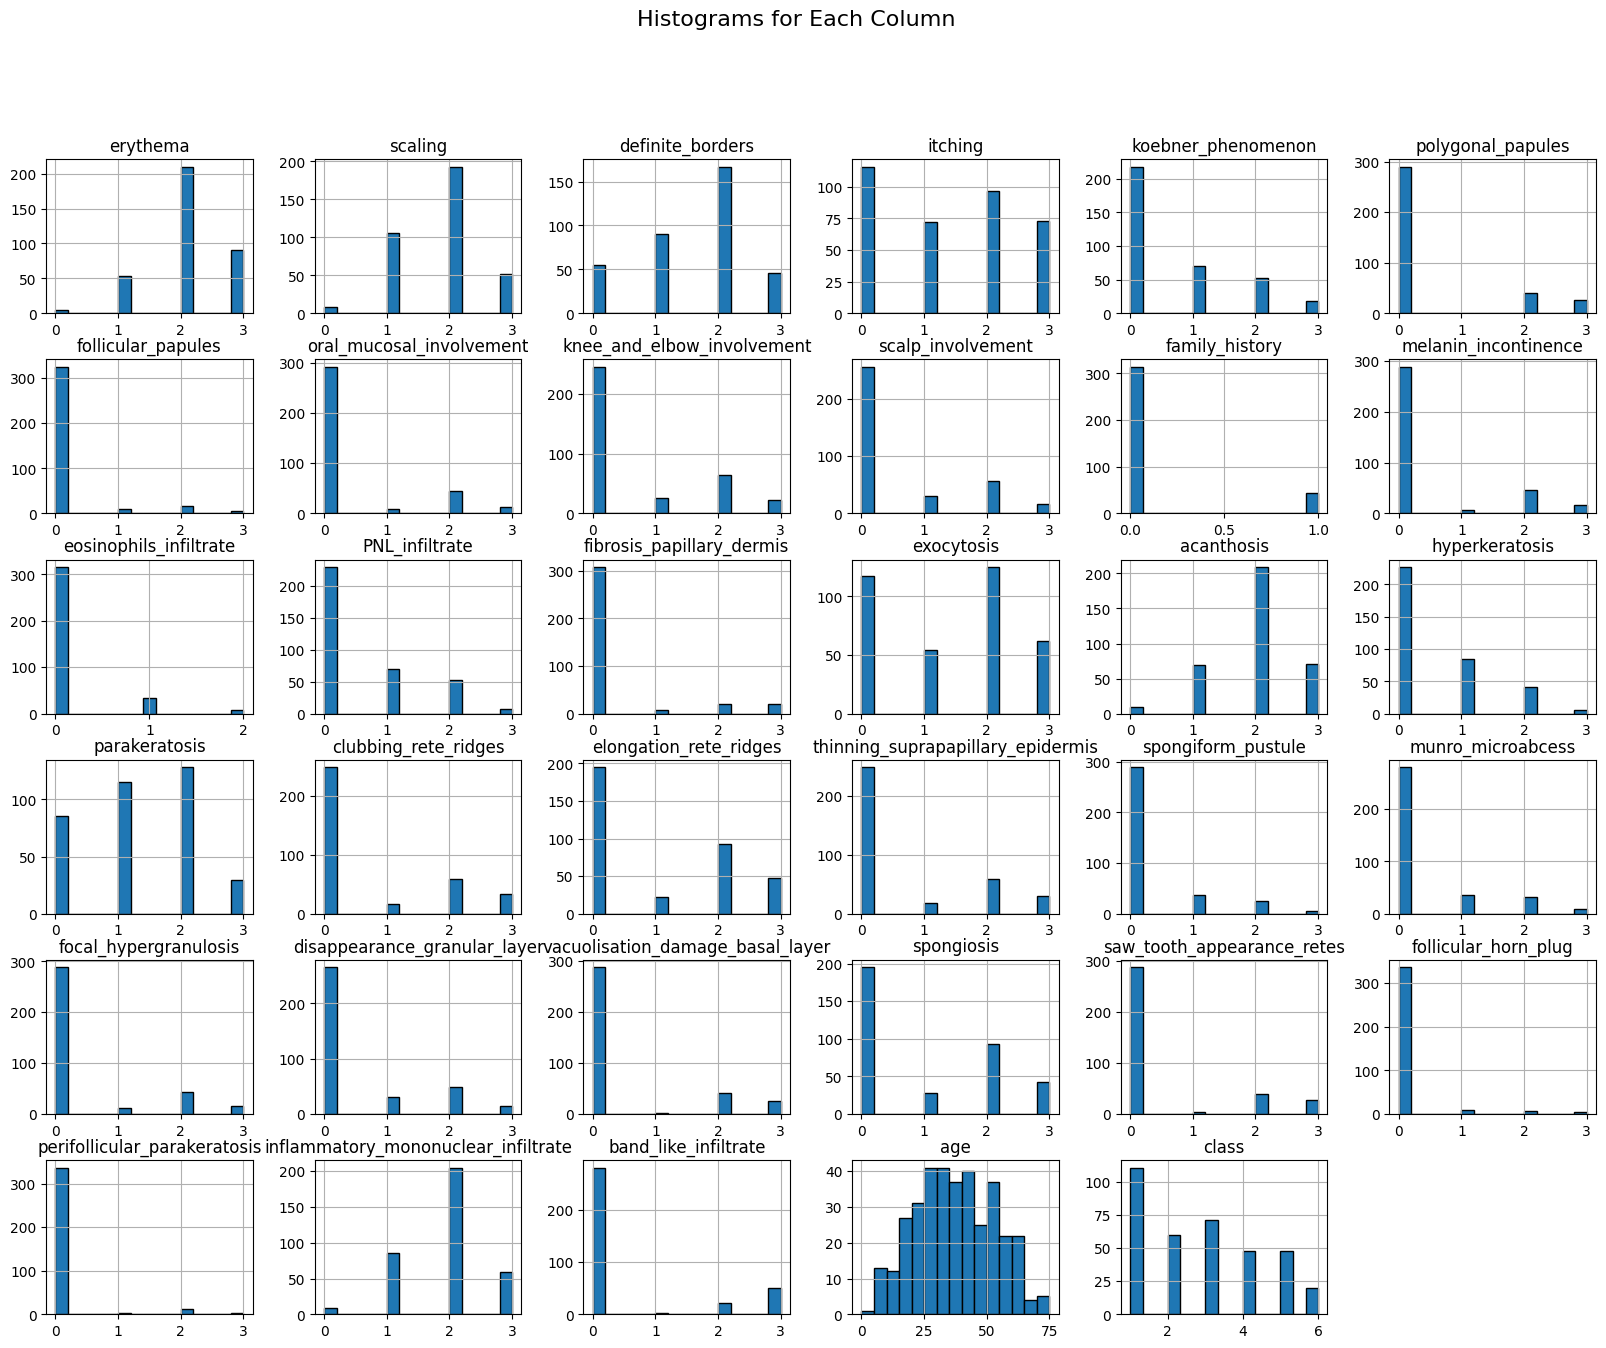

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

data = pd.read_csv('dermatology_database_1.csv')

# Convert 'age' column to numeric and drop rows with missing values
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM and Random Forest models
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Initial Results:")
print(f"SVM Accuracy: {svm_accuracy}\n")
print(svm_report)
print(f"Random Forest Accuracy: {rf_accuracy}\n")
print(rf_report)

# Detect and remove outliers using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso.fit_predict(X)

# Keep only non-outliers
non_outliers = outlier_pred == 1
data_no_outliers = data[non_outliers]

# Separate features and target in the dataset without outliers
X_no_outliers = data_no_outliers.drop(columns=['class'])
y_no_outliers = data_no_outliers['class']

# Split the data without outliers
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42, stratify=y_no_outliers
)

# Retrain models on data without outliers
svm_model_no_outliers = SVC(random_state=42)
rf_model_no_outliers = RandomForestClassifier(random_state=42)

svm_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predictions and evaluation
svm_predictions_no_outliers = svm_model_no_outliers.predict(X_test_no_outliers)
rf_predictions_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

svm_accuracy_no_outliers = accuracy_score(y_test_no_outliers, svm_predictions_no_outliers)
rf_accuracy_no_outliers = accuracy_score(y_test_no_outliers, rf_predictions_no_outliers)
svm_report_no_outliers = classification_report(y_test_no_outliers, svm_predictions_no_outliers)
rf_report_no_outliers = classification_report(y_test_no_outliers, rf_predictions_no_outliers)

print("Results After Removing Outliers:")
print(f"SVM Accuracy: {svm_accuracy_no_outliers}\n")
print(svm_report_no_outliers)
print(f"Random Forest Accuracy: {rf_accuracy_no_outliers}\n")
print(rf_report_no_outliers)

# Plot histograms for all columns
data.hist(bins=15, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms for Each Column", fontsize=16)
plt.show()
